**Set Algebra**

$S \cap \left(T \cup U\right) = \left(S \cap T \right) \cup \left(S \cap U \right)$

$S \cup \left(T \cap U \right) = \left(S \cup T \right) \cap \left(S \cup U \right)$

**De Morgan's Laws**

$$\left( \bigcup_n S_n \right)^c = \bigcap_n S_n^c$$

Represents everything that is not in *at least one set* and in words reads as the compliment of the union of a collection of sets equals the intersection of the set compliments.

$$\left( \bigcap_n S_n \right)^c = \bigcup_n S_n^c$$

Represents everything that is not in all sets and in words reads as the compliment of the intersection of a collection of sets is equal to the union of the compliments.

**Probability Axioms**

1. **Nonnegativity** - For every event *A*, $P(A) \ge 0$
2. **Additivity** - For any sequence of **disjoint** events, the probability of their union is the sum of their individual probabilities <br/> <br/>
$$P\left( A_1 \cup A_2 \cup \ldots \right) = P\left(A_1\right) + P\left(A_2\right) + \ldots$$ <br/>
3. **Normalization** - The probability of the entire sample space is equal to 1

**Conditional Probability**

$$P\left(A \vert B\right) = \frac{P\left(A \cap B\right)}{P\left(B\right)}$$

Can think of $P(B)\hspace{1pt}$ as the fraction of the total sample space $\Omega$ occupied by the event $B$ and $P(A\cap B)\hspace{1pt}$ as the fraction $\Omega$ occupied by the interesection of $A$ and $B$, thus the conditinal probability is the fraction of $B\hspace{1pt}$ occupied by the event $A\cap B\hspace{1pt}$. **NOTE** Conditional probabilities are themselves a valid probability law and hence all statements that hold for unconditional probabilities also hold for conditional probabilities.

**Multiplication Rule**

Assuming all conditioning events have positive probability, the following holds

$$P\left(\cap_{i=1}^n A_i\right) = P\left(A_1\right)P\left(A_2 \vert A_1 \right) P\left(A_3 \vert A_1 \cap A_2 \right) \ldots P\left(A_n \vert \cap_{i=1}^{n-1} A_i \right)$$

Note there is nothing special about the ordering of the events in this statement. Any event, $A_i\hspace{1 pt}$ can be used as the leading term see page 24 of text.

*Example: Drawing three cards without a heart*

This is example 1.10, page 25 from [1]. Consider three cards drawn from an ordinary 52-card deck without replacement. Find the probability that none of the three cards is a heart. As shown in the text this problem can be solved using the multiplication rule. Namely, define the event

$$A_i = \left\{ \mbox{the} \hspace{1pt} i^{th} \hspace{1pt} \mbox{card is not a heart} \right\}$$

The probability we seek is 

$$P\left(A_1 \cap A_2 \cap A_3\right) = P\left(A_1\right)P\left(A_2 \vert A_1 \right) P\left(A_3 \vert A_1 \cap A_2 \right)$$

As shown in the text this equal to 

$$P\left(A_1\right)P\left(A_2 \vert A_1 \right) P\left(A_3 \vert A_1 \cap A_2 \right) = \frac{39}{52}\frac{38}{51}\frac{37}{50}\approx 0.414$$

Below we simulate drawing three cards from a deck. The deck is represented as an array of integers from 1 to 52. Let integers 1-13 represent the cards with hearts. We "shuffle" the deck with the [Fisher and Yate's Algorithm](http://en.wikipedia.org/wiki/Fisher%E2%80%93Yates_shuffle) and examine the cummulative probability of the event of no hearts being drawn in the first three draws as well as the three events used in the calculation above.

[748, 540, 421]
Theoretical Results:
P(A1) = 0.75 	 P(A2 | A1) = 0.745098039216 	 P(A3 | A1,A2) = 0.74
Observed Results:
P(A1) = 0.748 	 P(A2 | A1) = 0.72192513369 	 P(A3 | A1,A2) = 0.77962962963
Theoretical probability of no hearts in first three draws
P(A1,A2,A3) = 0.413529411765
Observed probability of no hearts in first three draws
P(A1,A2,A3) = 0.421


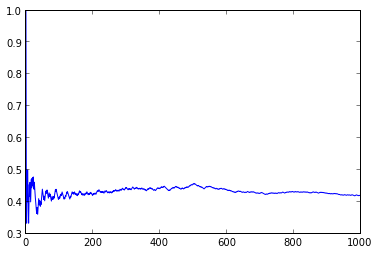

In [1]:
from functools import partial
def swap(i,deck):
    j = numpy.random.randint(0,i)
    tmp = deck[j]
    deck[j] = deck[i]
    deck[i] = tmp
    return deck

def shuffledDeck(size=52):
    deck = range(1,size+1)
    idx = [size - i for i in range(1,size)]
    map(partial(swap, deck=deck), idx)
    return deck
    
totalExperiments = 1000

def experiment(A):
    deck = shuffledDeck()
    hearts = range(1,14)
    a1 = deck[0] not in hearts
    a2 = deck[1] not in hearts and a1
    a3 = deck[2] not in hearts and a1 and a2
    return [a1+A[0],a2+A[1],a3+A[2]]

rslt = [0,0,0]
cumA = []
for i in range(totalExperiments):
    rslt = experiment(rslt)
    cumA.append(rslt[2]/float(i+1))

print rslt 
print "Theoretical Results:"
print "P(A1) = {0} \t P(A2 | A1) = {1} \t P(A3 | A1,A2) = {2}".format(39/float(52),38/float(51),37/float(50))
print "Observed Results:"
print "P(A1) = {0} \t P(A2 | A1) = {1} \t P(A3 | A1,A2) = {2}".format(rslt[0]/float(totalExperiments), rslt[1]/float(rslt[0]), rslt[2]/float(rslt[1]))
print "Theoretical probability of no hearts in first three draws"
print "P(A1,A2,A3) = {0}".format(39/float(52)*38/float(51)*37/float(50))
print "Observed probability of no hearts in first three draws"
print "P(A1,A2,A3) = {0}".format(rslt[2]/float(totalExperiments))
pyplot.plot(cumA)

**Total Probability Theorem**
Let $A_1, \ldots, A_n\hspace{1 pt}$ be disjoint events that form a partition of the sample space, i.e. each possible event is included in exactly one of the events $A_1, \ldots, A_n\hspace{1 pt}$, and assume $P(A_i)>0\hspace{1 pt}$ for all *i*, then for any event *B*

$$\begin{eqnarray} P\left( B \right) &=& P\left(A_1\cap B\right) + \ldots + P\left(A_n \cap B\right) \cr
                                &=& P\left(A_1\right)P\left(B \vert A_1\right) + \ldots + P\left(A_n\right)P\left(B\vert A_n\right)
\end{eqnarray}$$

A simple consequence of this theorem is that for a given set *A* we have the following

$$P\left(B\right) = P\left(A \cap B \right) + P\left(A^c \cap B \right)$$

**Bayes' Rule**

Let $A_1, A_2, \ldots, A_n\hspace{1 pt}$ be **disjoint** events that form a partition of the sample space and assume that $P(A_i)>0\hspace{1 pt}$ for all *i*, then for any event *B* such that $P(B)>0\hspace{1 pt}$, we have

$$\begin{eqnarray}
P\left(A_i \vert B \right) &=& \frac{P\left(A_i\right) P\left(B \vert A_i\right)}{P\left(B\right)} \cr
&=& \frac{P\left(A_i\right) P\left(B \vert A_i\right)}{P\left(A_1\right)P\left(B\vert A_1\right) + \ldots + P\left(A_n\right)P\left(B\vert A_n\right)}
\end{eqnarray}$$

where the second equality is a consequence of the Total Probability Theorem. 

Bayes' rule is often used for **inference**. There are a number of "causes" that may result in a certain "effect". We observe the effect and wish to infer the cause. Given that the effect *B* has occurred, we wish to evaluate the probability $P(A_i\vert B)\hspace{1 pt}$ that the cause $A_i\hspace{1 pt}$ is present. Refer to $P(A_i \vert B)\hspace{1 pt}$ as the **posterior probability** of the event $A_i\hspace{1 pt}$ and $P(A_i)\hspace{1 pt}$ as the **prior probability**.

*Example: The False-Positive Puzzle*

This is example 1.18, page 33 from [1].

Assume a test for a certain *rare* disease is 95% accurte in both postive and negative cases. Assume also that it is known that the 0.1% of the general population has the disease. This requires some clarification. The proper interpretation here is that, given the person has the disease, the test result is positve 95% of the time and given that the person does not have the disease, the test is negative 95% of the time. As we will see, this is **not** the same as saying that the test is 95% accurate accross all patients. Given that a person tests postive for the disease, what is the probability of having the disease?

As shown in the text this can be solved using Baye's Rule as follows: Let *A* be the event that the person has the disease, and *B* be the event the test result is positive. The solution is then

$$P\left(A \vert B \right) = \frac{P\left(A\right)P\left(B\vert A\right)}{P\left(A\right)P\left(B\vert A\right) + P\left(A^c\right)P\left(B \vert A^c\right)}
=\frac{0.001 \cdot 0.95}{0.001\cdot 0.95 + 0.99 \cdot 0.05}=0.0187$$

Below we simulate this result:

In [6]:
numberPatients = 10000
PA = 0.001 #probability that a random patient has the disease
PBP = .95 #probability that test is positive if person actually has the disease

ACount = 0 #number of times person actually has disease
BCount = 0 #number of times test is positive
ABCount = 0 #number of times person has disease A test is positive

for i in range(numberPatients):
    r = numpy.random.uniform(0,1,2)
    if r[0]<=PA: #person has disease
        ACount += 1
        if r[1]<=PBP: 
            ABCount += 1
            BCount += 1
    else: #person doesn't have disease
        if r[1]>PBP: BCount += 1 
            
print "Observed Values"
print "P(A) = {0} \t P(B) = {1} \t P(A|B) = {2}".format(ACount/float(numberPatients),BCount/float(numberPatients),ABCount/float(BCount))

Observed Values
P(A) = 0.001 	 P(B) = 0.0493 	 P(A|B) = 0.0141987829615


**Independence**

Two events *A* and *B* are defined as **independent** iff

$$P\left(A\cap B \right) = P\left(A\right)P\left(B\right)$$

The above definition is equivalent to defining the events as independent when 

$$P\left(A \vert B\right) = P\left(A\right)$$

We use the first definition as it holds even when $P(B)=0 \hspace{1 pt}$. Note that *set disjointness* does **not** imply independence. Indeed the opposite is true. Given disjoint sets *A* and *B* each with probability greater than 0, then the occurrance or non-oncurrance of either event provides complete information about the occurrance of the other event, e.g. $P(A|B) = 0\hspace{1 pt}$, so that

$$P\left(A\cap B \right) = 0 \lt P(A)P(B)$$

**Several** events $A_1, A_2, \ldots, A_n \hspace{1pt}$ are independent if

$$P\left(\bigcap_{i\in S} A_i \right) = \prod_{i\in S} P\left(A_i\right)$$

for every subset $s \subset S = \left\{1,2,\ldots,n\right\} \hspace{1 pt}$ Note it is **not** enough that the condition hold for *S*, it must hold for every subset of S. 

**Conditional Independence**

Given an event *C*, the events *A* and *B* are called **conditionally independent** if

$$P\left(A \cap B \vert C \right) = P\left(A \vert C\right) P\left(B \hspace{1pt}\vert\hspace{1pt} C\right)$$

The above definition is equivalent to 

$$P\left(A \cap B \vert C\right) = P\left(B\vert C\right) P\left(A\vert B \cap C\right)$$

which can be interpreted as indicating that if *C* is known to have occurred, the additional information that *B* has occurred does not change the probability of *A*. Note, unconditional independence of *A* and *B* does **not** imply conditional independence and vice versa.